### Predicting presence of heart disease

### 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Data visualization

Checking for null values

In [3]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

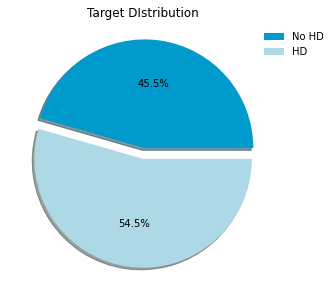

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
labels = ['No HD','HD']
explode=(0.1,0)

values = df['target'].value_counts().sort_index().values
ax.pie(values,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax.set_title('Target DIstribution')
ax.legend(labels,frameon=False, loc='upper right', bbox_to_anchor=(1.2,1))

plt.show()

Visualizaing the distribution of various attributes. 
Here we go through Sr Cholesterol, resting Blood pressurenand age which are continuous numerical values.
Also we check categorical attribute, chest pain.  

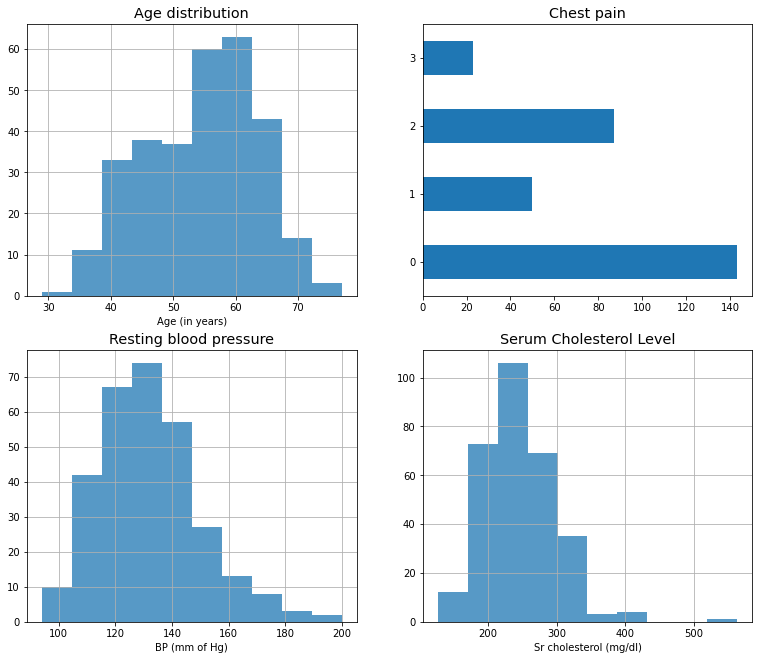

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(13,11))
plt.rcParams['font.size']=12

ax1 = df['age'].hist(ax=axes[0,0],alpha=0.75)
ax1.set_title('Age distribution')
ax1.set_xlabel('Age (in years)')

df1=df['cp'].value_counts().sort_index()
title='Chest pain'
#['asymptomatic','non-anginal pain','atypical angina','typical angina']
ax2 = df1.plot(kind='barh',ax=axes[0,1],title=title)

ax3 = df['trestbps'].hist(ax=axes[1,0],alpha=0.75)
ax3.set_title('Resting blood pressure')
ax3.set_xlabel('BP (mm of Hg)')

ax4 = df['chol'].hist(ax=axes[1,1],alpha=0.75)
ax4.set_title('Serum Cholesterol Level')
ax4.set_xlabel('Sr cholesterol (mg/dl)')

plt.show()

**Comparing the gender and FBS distribution among two target classes, with and without HD.
It is important to know if the attributes are equally found in both classes or not to decide on the model performance evaluation method.**

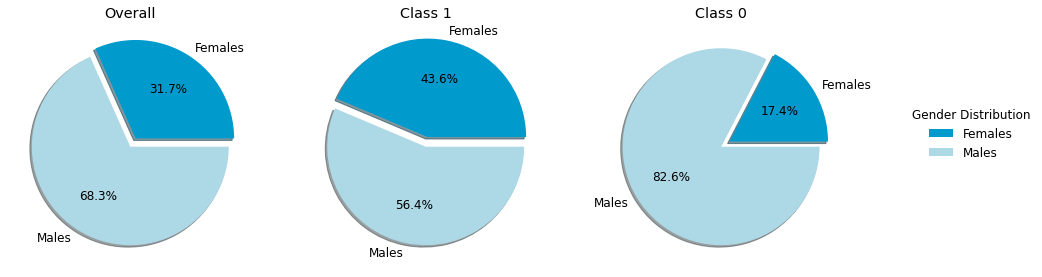

In [6]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
labels = ['Females','Males']

values1 = df['sex'].value_counts().sort_index().values
values2 = df[df['target']==1]['sex'].value_counts().sort_index().values
values3 = df[df['target']==0]['sex'].value_counts().sort_index().values

explode=(0.1,0)

ax[0].pie(values1,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Overall')
#ax[0].legend(frameon=False)

ax[1].pie(values2,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[1].set_title('Class 1')
#ax[1].legend(frameon=False)

ax[2].pie(values3,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[2].set_title('Class 0')
ax[2].legend(title='Gender Distribution',frameon=False, loc='upper right', bbox_to_anchor=(1.8,0.7))

plt.show()

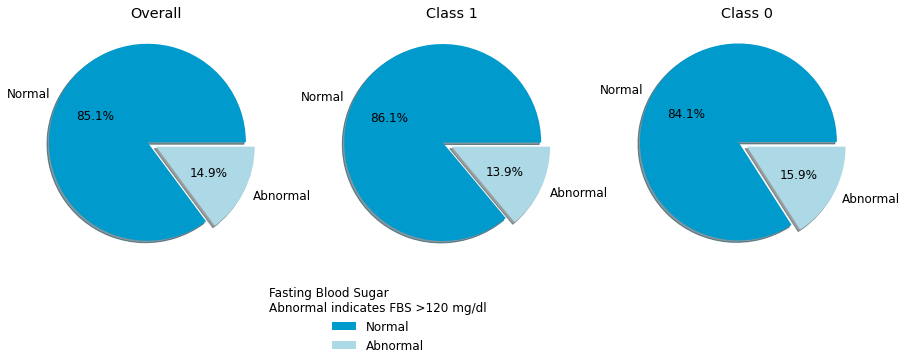

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,8))
labels = ['Normal','Abnormal']
values1 = df['fbs'].value_counts().sort_index().values
values2 = df[df['target']==1]['fbs'].value_counts().sort_index().values
values3 = df[df['target']==0]['fbs'].value_counts().sort_index().values
explode=(0.1,0)

ax[0].pie(values1,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Overall')

ax[1].pie(values2,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[1].set_title('Class 1')


ax[2].pie(values3,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[2].set_title('Class 0')
ax[2].legend(title='Fasting Blood Sugar\nAbnormal indicates FBS >120 mg/dl',frameon=False, loc='center', bbox_to_anchor=(-1,-0.2))


#ax.axis('equal')

plt.show()

### 3. Data Wrangling
**Using one-hot-encoding for columns 'slope' and 'thal' as these are the categorical variables with non-ordinal values**

In [8]:
df = pd.get_dummies(df, columns=['slope','thal'])

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,1,1,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,0,1,0,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,0,1,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,0,1,0,0,1,0,0,1,0


In [10]:
X=df.drop('target',axis=1)

In [11]:
Y=df['target']

### 4. Applying Naive Bayes Classifier

#### Using K-fold crossvalidation to optimize the model performance by selecting best values for smoothing and prior fitting

### Tuning of smoothing factor (hyperparameter in our naive beyes algorithm) - alpha and k-fold crossvalidation for peformance tuning

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

k = 5
k_fold = StratifiedKFold(n_splits=k)
smoothing_factor_option = [1, 2, 3, 4, 5, 6]
fit_prior_option = [True, False]
auc_record = {}

In [13]:
for train_indices, test_indices in k_fold.split(X_train, Y_train):
    #Implemeting k-fold cross-validation
    x_train, x_test = X_train.iloc[train_indices,:], X_train.iloc[test_indices,:]
    y_train, y_test = Y_train.iloc[train_indices], Y_train.iloc[test_indices]
    
    #For various smoothing values
    for alpha in smoothing_factor_option:
        if alpha not in auc_record:
            auc_record[alpha] = {}
        
        # prior fitting option
        for fit_prior in fit_prior_option:
            
            #Applying naive beyes algorithm
            nbc = MultinomialNB(alpha=alpha, 
                                fit_prior=fit_prior)
            nbc.fit(x_train, y_train)
            prediction_prob = nbc.predict_proba(x_test)
            pos_prob = prediction_prob[:, 1]
            auc = roc_auc_score(y_test, pos_prob)
            auc_record[alpha][fit_prior] = auc+auc_record[alpha].get(fit_prior, 0.0)

In [14]:
best={}
area=[]
for smoothing, smoothing_record in auc_record.items():
    for fit_prior, auc in smoothing_record.items():            
        print(f'    {smoothing}        {fit_prior}    {auc/k:.5f}')

    1        True    0.85570
    1        False    0.85570
    2        True    0.85467
    2        False    0.85467
    3        True    0.85399
    3        False    0.85399
    4        True    0.85192
    4        False    0.85192
    5        True    0.85087
    5        False    0.85087
    6        True    0.85017
    6        False    0.85017


### 5. Analysing model performance

In [15]:
# Final best model with smoothing 1 and prior not fitted
nbc = MultinomialNB(alpha=1.0, fit_prior=True)
nbc.fit(X_train, Y_train)

prediction = nbc.predict(X_val)

#Calculating accuracy
accuracy = nbc.score(X_val, Y_val)
print(f'The accuracy is: {accuracy*100:.1f}%')

#Calculating area under curve for 
pos_prob = nbc.predict_proba(X_val)[:, 1]
print('AUC with the best model:', roc_auc_score(Y_val, pos_prob))

The accuracy is: 85.2%
AUC with the best model: 0.9256465517241379


### Plotting ROC curve

In [16]:
thresholds = np.arange(0.0, 1.1, 0.05)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_val):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            # if truth and prediction are both 1
            if y == 1:
                true_pos[i] += 1
                # if truth is 0 while prediction is 1
            else:
                false_pos[i] += 1
        else:
            break

In [17]:
n_pos_test = (Y_val == 1).sum()
n_neg_test = (Y_val == 0).sum()
true_pos_rate = [tp / n_pos_test for tp in true_pos]
false_pos_rate = [fp / n_neg_test for fp in false_pos]

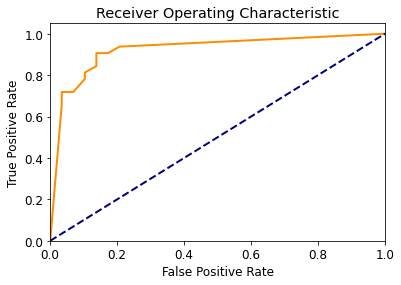

In [18]:
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, 
          color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_val, prediction, labels=[0, 1]),columns=['Neg. Pred','Pos. Pred.'], index=['No HD','HD'])

,Neg. Pred,Pos. Pred.
No HD,25,4
HD,5,27


In [20]:
from sklearn.metrics import classification_report
report = classification_report(Y_val, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

